# 内置序列

1.容器序列：list、tuple、collections.deque。容器序列存的是引用。

2.扁平序列：str、bytes、bytearray、memoryview、array.array，这些序列只能存放同类型数据，扁平序列存的是值因此扁平序列在内存中是一段连续的内存空间因此更加紧凑，但扁平序列只能存放基础类型。

3.可变序列：list、bytearray、array.array、collections.deque、memoryview

4.不可变序列：tuple、str、bytes

可变序列（MutableSequence）与不可变序列（Sequence）继承关系（python内置序列并不是直接从这两个抽象基类继承而来）：
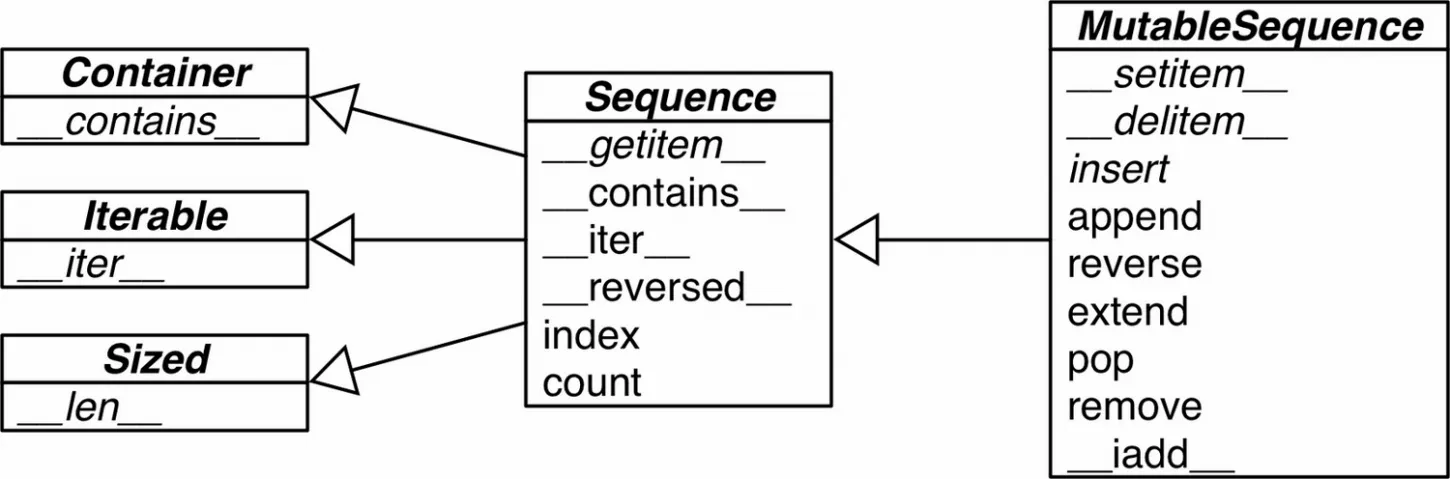

# 类表推导和生成器表达式
## 列表推导
应用原则：列表推导应当只用于创建新的列表，并尽量保持间断。

In [1]:
symbols = "$@#%"
[ord(s) for s in symbols]

[36, 64, 35, 37]

列表推导、生成器表达式、集合推导、字典推导在python3中有自己的局部作用域。如例子中两个同名变量x，分别代表局部作用域内的变量和外部全局作用域的变量。因此使用推导，可以避免局部变量泄漏的问题。

In [3]:
x = 'ABC'
print([x for x in x], x)

['A', 'B', 'C'] ABC


## 生成器表达式
1.生成器表达式遵循了生成器协议，因此可以逐个产出元素而非直接得到全部元素在内存中.下面示例中内存里不会留下一个长度为4的列表(除非存下来)，因为生成器每次产生一个元素

2.若生成器表达式作为唯一参数，可省略（）

In [6]:
symbols = "$@#%"
for i in (ord(s) for s in symbols):
    print(i)

36
64
35
37


# 元组
1.元组其实是对数据的记录，不仅记录了值，也记录了每个元素的相对位置。

2.元组也常用于拆包，被拆包的对象可以是任意Iterable对象。

3.利用*args捕获不确定拆包参数,*args可放在任意位置但只能有一个。示例：

In [56]:
# *运算符可用于捕获元素，用在函数形参中可用于捕获位置参数（捕获后形成元组），用于传参则可以对Iterable进行自动拆包传参。
a, *b, c = (1, 2, 3)
b

[2]

In [14]:
# 嵌套拆包
a, (b, c) = (1, (2, 3))

## 具名元组
1.具名元组可用于构建仅含有属性的类，需指定类名和属性名list(或用空格分隔符的字符串)。

#### 2.namedtuple构建的类的实例和元组消耗的内存是相同的，因为其字段名称被存在对应的类里。
该实例比通常的python对象更小，因为python不会用\__dict__存放这些实例的属性。

3.namedtuple构建的类可调用其_make(Iterable)生成实例

In [17]:
import collections
City = collections.namedtuple('City', ['name','country','population','coordinates'])
tokyo = City('Tokyo', 'JP', '36.933', (35.6897, 139.6916))
tokyo.name

'Tokyo'

In [16]:
tokyo = City._make(('Tokyo', 'JP', '36.933', (35.6897, 139.6916)))
tokyo

City(name='Tokyo', country='JP', population='36.933', coordinates=(35.6897, 139.6916))

# 切片
当使用切片时，对seq[start, stop, step]实际上python会传入切片对象调用seq.\__item__(slice(start, stop, step))，切片也是对象。
## 多维切片
当进行多维切片时，对象的特殊方法\__getitem__和\__setitem__接受的是多维索引元组，如调用a[i,j]是加上是a.\__getitem__((i, j))

切片赋值：如果被赋值的是一个切片部分，那么=右侧必须是Iterable即使是只有一个元素,切片部分将会被可迭代对象内的元素代替。

In [23]:
l = [1,2,3]
l[0:2] = (7,)
l

[7, 3]

# 序列使用+和*
1.+可生成新的拼接序列，但两个序列不会被修改，\* 同理，* 可快速生成包含若干相同部分的新序列。

### 2.如果序列存放的是引用类型，那么 \* 会复制引用。
示例如下：对[['\_','\_','\_']]使用*快速3倍扩充作为新的序列，但是新的序列复制了3份原序列的引用元素。

In [27]:
# 快速列表生成
board = [['_'] * 3] * 3
board[0][0] = 1
board

[[1, '_', '_'], [1, '_', '_'], [1, '_', '_']]

In [29]:
# 可以使用列表推导，每次生成独立对象
board = [['_'] * 3 for i in range(3)]
board[0][0] = 1
board

[[1, '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

# 序列增量赋值
1.增量赋值的特殊方法为\__iadd__，表示就地加法，如果没有该方法，python就会调用\__add__。
#### 2.如a += b,如果含有\__iadd__相当于执行a.\__iadd__(b)，如果仅有\__add__方法则相当于c = a.\__add__(b)，a = c。
类似的\*=也是如此

3.对于不可变对象使用增量赋值效率很低，python需要不断生成新的不可变对象。

In [32]:
# 由于不可变序列不支持__imul__，因此会调用对应__mul__方法然后返回新的元组
t = (1, 2, 3)
print(id(t))
t *= 3
print(id(t))

2247432867560
2247432116888


## 增量赋值的非原子问题
增量赋值并不是以个原子操作，a += b,相当于执行a.\__iadd__(b)，然后会重新返回对象a的索引（和增量赋值前的a对象索引相同），示例：

In [39]:
t = (1, 2, [30, 40])
t[2] += [50, 60]

TypeError: 'tuple' object does not support item assignment

In [38]:
# 虽然报错，但对[30, 40]的增量赋值生效。
t

(1, 2, [30, 40, 50, 60])

1.字节码6表示t[2]放入栈顶

2.字节码14表示完成对栈顶元素的增量赋值：TOP(top of stack) += [50, 60],因为栈顶元素可变。

3.字节码18表示，对t[2]的重新赋值存出结果（t[2]对象实际位置的索引）导致对tuple的更改。

4.如果t[2] += [50, 60]改为t[2].extend([50, 60])则不会报错，因为没有重新返回索引这一步。

In [42]:
import dis
dis.dis('t[2] += [50, 60]')

  1           0 LOAD_NAME                0 (t)
              2 LOAD_CONST               0 (2)
              4 DUP_TOP_TWO
              6 BINARY_SUBSCR
              8 LOAD_CONST               1 (50)
             10 LOAD_CONST               2 (60)
             12 BUILD_LIST               2
             14 INPLACE_ADD
             16 ROT_THREE
             18 STORE_SUBSCR
             20 LOAD_CONST               3 (None)
             22 RETURN_VALUE


# list.sort和内置sorted
list.sort会就地排序，内置的sorted接受任何Iterable对象，会返回新建的序列。

两种方法均接受两个关键字，reverse(bool)和key(function),key方法会作用在每个序列元素上生成对比关键字。

# bisect维护升序序列
bisect利用二分查找法返回查找元素应当存在的位置，bisect_right和bisect是用一个函数

bisect(Iterable, needle)会返回needle元素在Iterable（升序）的位置，Iterable中含有needle相同元素时返回右侧位置。

如果想直接插入可变序列，可直接使用bisect.insort(Iterable, needle),该方法会调用序列的insert方法同时查找使用的是bisect_right。

# 列表不是首选
#### 1.python中一切皆为对象，当使用list存放1000万个float数时，list实际存储了1000万个引用。如果用array效率就会很高，因为使用array时，python的背后存储的并非是float对象而是数字的机器翻译，也就是字节表述，这一点和C语言数组相同。

2.之所以用列表存放东西是希望这些元素在后面的使用中有一些通用的特性，即使这些元素不是一类。

3.如果想对序列做快速先进先出，则应该使用deque。

4.若想判断元素是否在集合中应当使用set，set对检查元素是否存在有特定优化。
## 数组
数组的创建需要指定类型码，这表示底层的C语言应当如何存放数据类型，如'b'表示有符号字符，范围为-128~127，数组支持所有跟可变序列有关的操作。

array可方便的存储，且存放的数据中不含其它数据，存储1000万个双精度浮点数（8B）为二进制文件，大小为8000万字节（不到80MB）无需额外空间。

另外一个快速序列化方法是使用pickle模块。

In [51]:
from array import array
from random import random
# 指定生成器
floats = array('d', (random() for i in range(10**7)))
fp = open('floats.bin', 'wb')
floats.tofile(fp)
fp.close()

floats2 =  array('d')
fp = open('floats.bin', 'rb')
floats2.fromfile(fp, 10**7)
fp.close()
floats2[-1]

0.4547102550184574

## memoryview
memoryview是内置类，能在不复制内容的情况下操作一个数组的不同切片。

memoryview能用不同的方式读写同一块内存数据,数据不会发生移动。

In [55]:
numbers = array('h', [-2, -1, 0, 1, 2]) # 短有符号整型（2B）
memv = memoryview(numbers)
# 以uint8形式读取(1B)
memv_oct = memv.cast('B')
print(memv_oct.tolist())
# 在原数组第3个元素高位部分写入数据
memv_oct[5] = 4
print(numbers)

[254, 255, 255, 255, 0, 0, 1, 0, 2, 0]
array('h', [-2, -1, 1024, 1, 2])


## 队列
#### 1.面对先进先出的场景时应当优先使用线程安全的cpllections.deque（应该是双向量表），如果用list的append和pop(0)进行模型，则效率很差（list是可变长数组，这里涉及到元素的移动，效率很低）
2.deque的append和popleft都是原子操作，线程安全。